In [43]:
import boto3
import json
from boto3 import client
from boto3.session import Session
from IPython.display import Image
import requests

In [2]:
#aws access and secret key
AWS_ACCESS_KEY_ID='AWS_ACCESS_KEY_ID'
AWS_SECRET_ACCESS_KEY='AWS_SECRET_ACCESS_KEY'

In [3]:
# Configuration settings
REGION = 'us-east-1'     # AWS region in which to create resources
API_NAME = 'dev_api'     # API name in API Gateway
API_STAGE='dev'          # API Gateway stage
INPUT_FILE='medication_input.json' #Input file available in s3 bucket

In [4]:
#Initialization of api gateway client
api_client = boto3.client('apigateway', aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY,region_name=REGION)

In [6]:
#@create_rest_api_for_aws_service:Creating REST API 
def create_rest_api_for_aws_service(api_name, region):
    result = api_client.create_rest_api(name=api_name,apiKeySource='HEADER',endpointConfiguration={'types':['REGIONAL']})
    api_id = result['id']
    print('Created REST API: { '+str(result["name"])+' } , ID: {' +str(api_id)+' }')
    return api_id

In [7]:
api_id=create_rest_api_for_aws_service(API_NAME,REGION)
print('api_id : '+str(api_id))

Created REST API: { dev_api } , ID: {3w4s4oljy9 }
api_id : 3w4s4oljy9


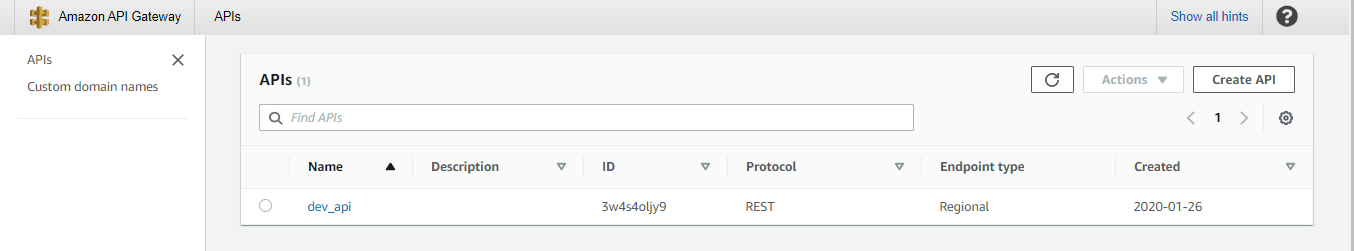

In [9]:
Image(filename='C:/Users/hp/Desktop/Py/aws/api_gateway_create_api.png')

In [10]:
#@create_resource_api_gateway:Creating resource for REST API created
def create_resource_api_gateway():
    rest_api_id=api_id
    api_resource_name='{files}'
    resource_info=api_client.get_resources(restApiId=rest_api_id)
    print ('resource_info : '+str(resource_info))
    parent_id = None
    for item in resource_info['items']:
        if item['path'] == '/':
            parent_id = item['id']
            print ('parent_id :' +str(parent_id))
    resource_api=api_client.create_resource(restApiId=rest_api_id,parentId=parent_id,pathPart=api_resource_name) 
    resource_id = resource_api['id']
    return resource_id

In [11]:
resource_id=create_resource_api_gateway()
print('resource_id : '+str(resource_id))

resource_info : {u'items': [{u'path': u'/', u'id': u'eo1ynxkrxf'}], 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': '3146871e-2931-4491-909c-c56774b024b4', 'HTTPHeaders': {'x-amzn-requestid': '3146871e-2931-4491-909c-c56774b024b4', 'content-length': '42', 'x-amz-apigw-id': 'G60RZJMuIAMEbdg=', 'connection': 'keep-alive', 'date': 'Sun, 26 Jan 2020 17:34:26 GMT', 'content-type': 'application/json'}}}
parent_id :eo1ynxkrxf
resource_id : negtbm


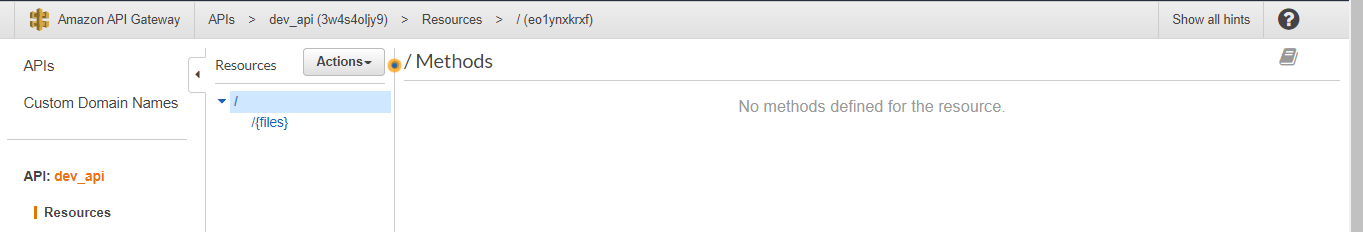

In [12]:
Image(filename='C:/Users/hp/Desktop/Py/aws/api_gateway_create_resource.png')

In [17]:
#@create_get_method__api_gateway:Creating method for the resource created out of REST API
def create_get_method__api_gateway():
    rest_api_id=api_id
    resource_id=resource_id
    get_method_param=api_client.put_method(restApiId=rest_api_id,resourceId=resource_id, 
                                     httpMethod='GET',authorizationType='NONE')
    return get_method_param

In [18]:
get_method_param=create_get_method__api_gateway()
print get_method_param

{u'apiKeyRequired': False, u'httpMethod': u'GET', u'authorizationType': u'NONE', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 201, 'RequestId': '33581a9f-f3a6-4d5a-8c9b-04c8dfa969c5', 'HTTPHeaders': {'x-amzn-requestid': '33581a9f-f3a6-4d5a-8c9b-04c8dfa969c5', 'content-length': '71', 'x-amz-apigw-id': 'G60uLIhtIAMEdPw=', 'connection': 'keep-alive', 'date': 'Sun, 26 Jan 2020 17:37:30 GMT', 'content-type': 'application/json'}}}


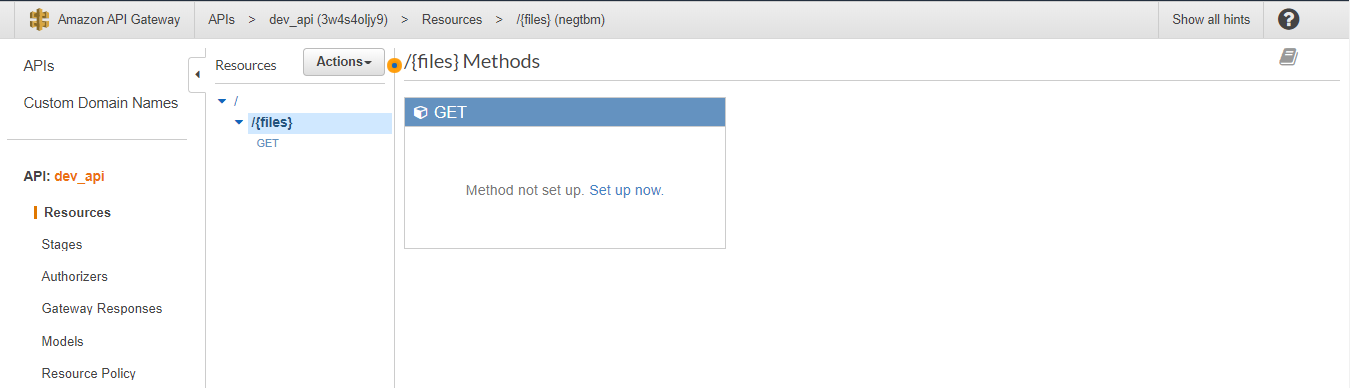

In [19]:
Image(filename='C:/Users/hp/Desktop/Py/aws/api_gateway_create_get_method.png')

In [24]:
#method to integrate resources : requires role id:arn s3:bucket url
def create_integration_for_get_method():
    rest_api_id=api_id
    resource_id=resourceId
    credential_id='arn:aws:iam::<Account-ID>:role/API-S3'
    url='arn:aws:apigateway:us-east-1:s3:path/awsbucketcm2506/{files}'    
    integration_info=api_client.put_integration(restApiId=rest_api_id,resourceId=resource_id,
                                                httpMethod='GET',type='AWS',integrationHttpMethod='GET',
                                                credentials=credential_id,
                                                uri=url,                                                
                                                passthroughBehavior='WHEN_NO_TEMPLATES')
    print (str(integration_info))
    return integration_info

In [25]:
resource_info=create_integration_for_get_method()

{u'passthroughBehavior': u'WHEN_NO_TEMPLATES', u'timeoutInMillis': 29000, 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 201, 'RequestId': 'c82e4ed6-2349-41d0-81c3-046344540fb3', 'HTTPHeaders': {'x-amzn-requestid': 'c82e4ed6-2349-41d0-81c3-046344540fb3', 'content-length': '273', 'x-amz-apigw-id': 'G61nFL8doAMEcgQ=', 'connection': 'keep-alive', 'date': 'Sun, 26 Jan 2020 17:43:34 GMT', 'content-type': 'application/json'}}, u'uri': u'arn:aws:apigateway:us-east-1:s3:path/awsbucketcm2506/{files}', u'httpMethod': u'GET', u'cacheNamespace': u'negtbm', u'credentials': u'arn:aws:iam::822766594142:role/API-S3', u'type': u'AWS', u'cacheKeyParameters': []}


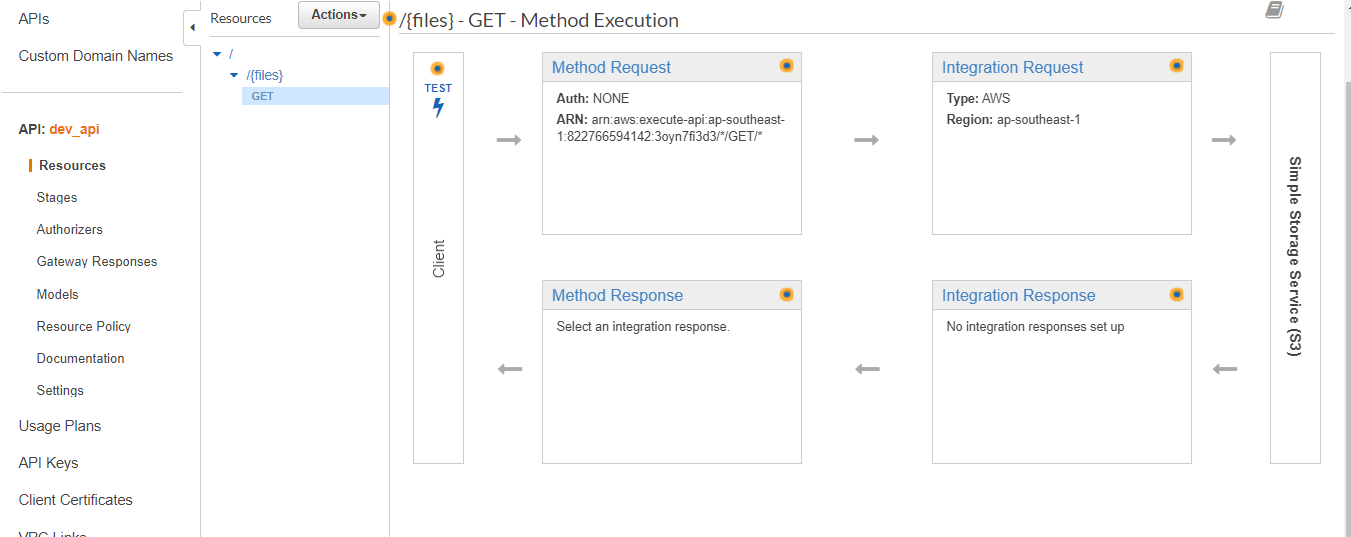

In [45]:
Image(filename='C:/Users/hp/Desktop/Py/aws/get_integration.png')

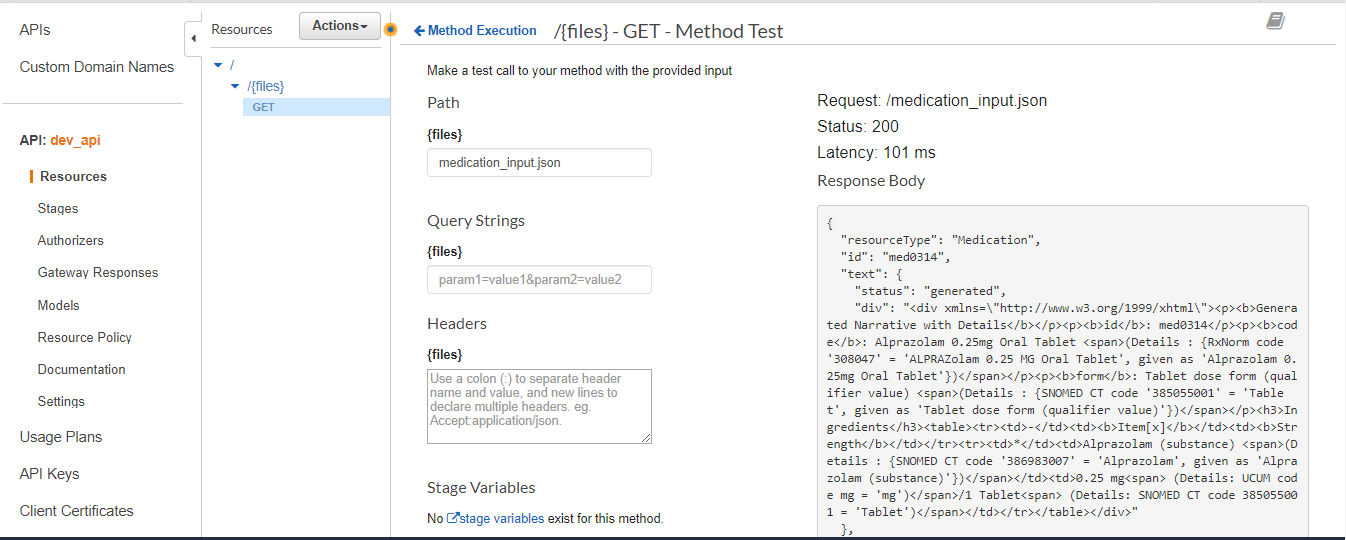

In [46]:
Image(filename='C:/Users/hp/Desktop/Py/aws/api_get_integration_test.png')

In [26]:
# Deploy the API
deploy_api=api_client.create_deployment(restApiId=api_id,stageName=API_STAGE)

In [27]:
print deploy_api

{u'id': u'3tzn8b', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 201, 'RequestId': '32bf911a-403b-4cb5-b122-e431f09c1091', 'HTTPHeaders': {'x-amzn-requestid': '32bf911a-403b-4cb5-b122-e431f09c1091', 'content-length': '41', 'x-amz-apigw-id': 'G63GkIp5IAMEbnw=', 'connection': 'keep-alive', 'date': 'Sun, 26 Jan 2020 17:53:46 GMT', 'content-type': 'application/json'}}, u'createdDate': datetime.datetime(2020, 1, 26, 23, 23, 46, tzinfo=tzlocal())}


In [29]:
stage_info = api_client.get_stage(restApiId=api_id,stageName=API_STAGE)

In [30]:
print stage_info

{u'tracingEnabled': False, u'stageName': u'dev', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': '509a1196-5d11-4654-84f7-56c20cec281e', 'HTTPHeaders': {'x-amzn-requestid': '509a1196-5d11-4654-84f7-56c20cec281e', 'content-length': '206', 'x-amz-apigw-id': 'G63ovIAeoAMEciA=', 'connection': 'keep-alive', 'date': 'Sun, 26 Jan 2020 17:57:24 GMT', 'content-type': 'application/json'}}, u'cacheClusterEnabled': False, u'cacheClusterStatus': u'NOT_AVAILABLE', u'deploymentId': u'm1xxfi', u'lastUpdatedDate': datetime.datetime(2020, 1, 26, 23, 24, 40, tzinfo=tzlocal()), u'createdDate': datetime.datetime(2020, 1, 26, 23, 23, 46, tzinfo=tzlocal()), u'methodSettings': {}}


In [51]:
#Construct the API URL
api_url = 'https://'+str(api_id)+'.execute-api.'+str(REGION)+'.amazonaws.com/'+str(API_STAGE)+'/'+str(INPUT_FILE)
#print api_url

In [46]:
input_json = requests.get(api_url)
input_json.json()

{u'code': {u'coding': [{u'code': u'308047',
    u'display': u'Alprazolam 0.25mg Oral Tablet',
    u'system': u'http://www.nlm.nih.gov/research/umls/rxnorm'}]},
 u'form': {u'coding': [{u'code': u'385055001',
    u'display': u'Tablet dose form (qualifier value)',
    u'system': u'http://snomed.info/sct'}]},
 u'id': u'med0314',
 u'ingredient': [{u'itemCodeableConcept': {u'coding': [{u'code': u'386983007',
      u'display': u'Alprazolam (substance)',
      u'system': u'http://snomed.info/sct'}]},
   u'strength': {u'denominator': {u'code': u'385055001',
     u'system': u'http://snomed.info/sct',
     u'unit': u'Tablet',
     u'value': 1},
    u'numerator': {u'code': u'mg',
     u'system': u'http://unitsofmeasure.org',
     u'value': 0.25}}}],
 u'resourceType': u'Medication',
 u'text': {u'div': u'<div xmlns="http://www.w3.org/1999/xhtml"><p><b>Generated Narrative with Details</b></p><p><b>id</b>: med0314</p><p><b>code</b>: Alprazolam 0.25mg Oral Tablet <span>(Details : {RxNorm code \'308047\